In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

microbes = ["Bif", "Lactobacilli", "Strep", "Staph", "Colostridium", "Enterococcus", "Bacteroides"]
samples = [f"Sample{i}" for i in range(1, 21)]

# FIXED: broadcast lam correctly
data = np.random.poisson(lam=np.array([120, 70, 60, 30, 20, 10, 5])[:, None], size=(7, 20))

df_count = pd.DataFrame(data, index=microbes, columns=samples)

df_count.to_csv("microbial_counts.csv")



In [4]:
%load_ext autoreload
%autoreload 2

from Microbial_Abundance_Lesson import run_microbiome_pipeline, classify_new_sample


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



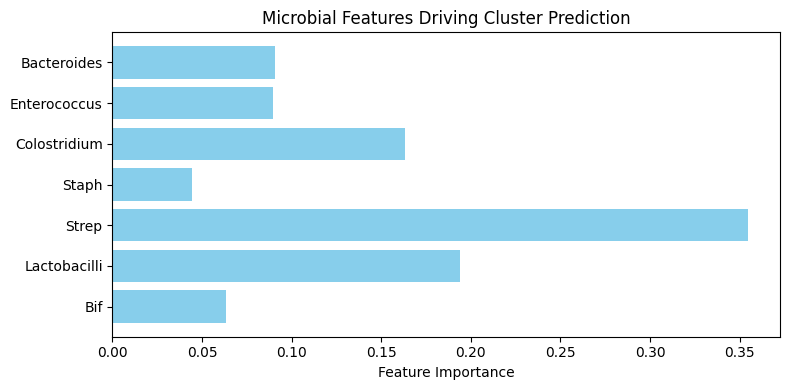

In [5]:
results = run_microbiome_pipeline(df_count)

In [6]:
import pandas as pd

new_sample = pd.DataFrame({
    "New Sample": [100, 70, 25, 10, 5, 0, 0]  # You can assign real values later
}, index=["Bif", "Lactobacilli", "Strep", "Staph", "Colostridium", "Enterococcus", "Bacteroides"])


cluster, label = classify_new_sample(new_sample, results["model"])
print(f"Cluster: {cluster} ({label})")



Cluster: 1 (Dysbiotic-like)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



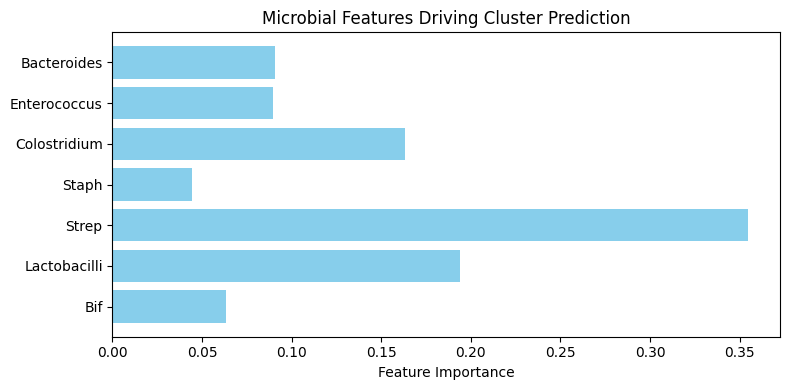

In [7]:
from Microbial_Abundance_Lesson import run_microbiome_pipeline
results = run_microbiome_pipeline(df_count)

results["clustered_data"].to_csv("clustered_predictions.csv")
new_sample["Predicted Label"] = label
new_sample.to_csv("new_sample_classification.csv")
